<p align="center">
<img src="img/SMM_cover.jpg" alt="Drawing" width="1000"/>
</p>
<center>Presented by Lynelle Chan</center>

<h2><center><b><u>Directory</u></b></center></h2>
<a id="Directory"></a>

 1. [Introduction](#Introduction)
 2. <a href = "#Data_import">Start Here</a>
 3. Datasheet Cleaning and Familiarization
     * [Overall](#Overall)
     * [Courses](#Courses)
     * [Course_Meta](#Course_Meta)
     * [Clears](#Clears)
     * [Likes](#Likes)
     * [Players](#Players)
     * [Plays](#Plays)
     * [Records](#Records)
 4. <a href = "#Data_analysis">Data Analysis</a><BR>
     * <a href="#Overallda">Overall</a><BR> 
     * <a href="#Level_tagging">Level Tagging</a><BR>
     * <a href="#Level_difficulty">Level of Difficulty</a><BR>
     * <a href="#Playersda">Players Analysis</a><BR>
     * <a href="#PPP">Players Playing Profile</a><BR>
 5. Sources
     * [Data](#Data)
     * [Images](#Images)
     * [Additional Sources](#Additional)
 6. Appendix
     * <a href = "#ERD">ERD</a>
     * <a href = "#Project_Plan">Project Plan</a>

<p align="center">
<img src="img/Super-mario-maker-2-nintendo-working-on-allowing-friends.jpg" width=1000>
</p>

<h3><center>Introduction</center></h3>

<i>The announcement of the discontinuation of Super Mario games and online services in March 2021, took many Super Mario fans by surprise. While the focus will be on the upcoming Pokemon and Zelda anniversaries, Nintendo has begun the process of developing new products for their 40th Anniversary of the Super Mario franchise that they will introduce at the Electronic Entertainment Expo (also known as E3) in 2024. 
    The planning team has asked the assistance of the data analyst team to evaluate a variety of popular Mario games and I have been asked to review the data for the Super Mario Maker game. During my analysis, I hope to discover what made the original Super Mario Maker so popular and provide recommendations for future deployments of the game.</i>

<br>

<b><i>What is Super Mario Maker?</i></b>

<i>Super Mario Maker is a 2D creation game that was originally released in 2015 on the Nintendo Wii U. This game allows players to design and share their own courses for others to play. The game incorporate courses from the styles of four previous Mario games (Super Mario Bros, Super Mario Bros 3, Super Mario World, and New Super Mario Bros. U).</i>

<div style="text-align: right"><a href = "#Directory">Directory</a></div>

<p align="center">
<img src="img/SMM_luggage.jpg" alt="Drawing" width="1000"/>
</p>

<h2><center><b><u>START HERE</u></b></center></h2><a id="Data_import"></a>

<center><B><I>Please run the following before reviewing code in the Data Analysis Section.</I></B></center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
course_meta=pd.read_csv('12_27_20_cm1.csv')
courses=pd.read_csv('12_27_20_courses.csv')
clears=pd.read_csv('12_27_20_clears.csv')
likes=pd.read_csv('12_21_20_likes.csv')
plays=pd.read_csv('12_27_20_plays.csv')
records=pd.read_csv('12_27_20_records.csv')
players=pd.read_csv('12_27_20_players.csv')
c_plays=pd.read_csv('12_26_20_c_plays.csv')
cm_courses=pd.read_csv('12_27_20_cm_courses.csv')
r_courses=pd.read_csv('12_29_20_r_courses.csv')
r_c_courses=pd.read_csv('12_29_20_r_c_players.csv')
c_players=pd.read_csv('12_29_20_c_players.csv')
p_players=pd.read_csv('12_29_20_p_players.csv')
r_c_players=pd.read_csv('12_29_20_r_c_players.csv')
p_p_courses=pd.read_csv('12_30_20_p_p_courses.csv')

C:\Users\GSUL User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
%matplotlib inline
import sqlite3
c_plays=pd.read_csv('12_26_20_c_plays.csv')
sqlite3.connect('SMM.db')

In [4]:
#connect to database
conn=sqlite3.connect('SMM.db')
#Create a cursor
c=conn.cursor()

c_plays.to_sql('c_plays',conn)

ValueError: Table 'c_plays' already exists.

In [7]:
cm_courses.to_sql('cm_courses',conn)

C:\Users\GSUL User\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


ValueError: Table 'cm_courses' already exists.

<div style="text-align: right"><a href = "#Directory">Directory</a></div>

<p align="center">
<img src="img/Mario_cleaning.jfif" alt="drawing" width='400'/>
</p>

<h2><center><b><u>Datasheet Cleaning And Familiarization</u></b></center></h2>

<h3>Original Data</h3>

In [ ]:
#Original Datafiles
course_meta=pd.read_csv('../Capstone/course-meta_debugged.csv')
courses=pd.read_csv('../Capstone/courses_debugged.csv')
clears=pd.read_csv('../Capstone/clears_debugged.csv')
likes=pd.read_csv('../Capstone/likes_debugged.csv')
plays=pd.read_csv('../Capstone/plays_debugged.csv')
records=pd.read_csv('../Capstone/records_debugged.csv')
players=pd.read_csv('../Capstone/players_debugged.csv')

<h3>Overall</h3>

File Dimensions

In [10]:
#File dimensions

#clears.shape,course_meta.shape, courses.shape, likes.shape, players.shape, plays.shape, records.shape

<div style="text-align: right"><a href = "#Directory">Directory</a></div>

<h3>Courses</h3> 

In [80]:
#courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115032 entries, 0 to 115031
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Creation    115032 non-null  object
 1   Difficulty  115032 non-null  object
 2   Game Style  115032 non-null  object
 3   Id          115032 non-null  object
 4   Image       115032 non-null  object
 5   Maker       114956 non-null  object
 6   Thumbnail   115032 non-null  object
 7   Title       115029 non-null  object
dtypes: object(8)
memory usage: 7.0+ MB


In [81]:
#courses.columns

Index(['Creation', 'Difficulty', 'Game Style', 'Id', 'Image', 'Maker',
       'Thumbnail', 'Title'],
      dtype='object')

In [132]:
courses=courses.reindex(columns=['Id','Title','Difficulty','Game Style',
                                'Maker','Creation','Image','Thumbnail'])

In [133]:
courses.rename(columns={'Id':'Map_id','Title':'Map_title','Game Style':'Game_style','Image':'Map_image',
                        'Thumbnail':'Map_thumbnail'},inplace=True)

In [134]:
courses.columns

Index(['Map_id', 'Map_title', 'Difficulty', 'Game_style', 'Maker', 'Creation',
       'Map_image', 'Map_thumbnail'],
      dtype='object')

In [135]:
courses.isnull().sum()

Map_id            0
Map_title         3
Difficulty        0
Game_style        0
Maker            76
Creation          0
Map_image         0
Map_thumbnail     0
dtype: int64

In [138]:
courses.to_csv('12_27_20_courses.csv',index=False)

<div style="text-align: right"><a href = "#Directory">Directory</a></div>

<h3>Course_Meta</h3> 

In [30]:
#course_meta.columns

Index(['Map_id', 'Level_tagging', 'Num_players_played', 'Who_cleared_first',
       'Num_attempts', 'Num_clears', 'Num_stars', 'Num_tweets', 'Clear Rate',
       'Catch'],
      dtype='object')

In [14]:
course_meta.rename(columns={'First Clear':'Who_cleared_first','Id':'Map_id',
                           'Tag':'Level_tagging','Attempts':'Num_attempts',
                           'Clears':'Num_clears','Players':'Num_players_played',
                           'Stars':'Num_stars','Tweets':'Num_tweets'},inplace=True)

In [15]:
course_meta.columns

Index(['Catch', 'Who_cleared_first', 'Map_id', 'Level_tagging', 'Num_attempts',
       'Clear Rate', 'Num_clears', 'Num_players_played', 'Num_stars',
       'Num_tweets'],
      dtype='object')

In [16]:
course_meta=course_meta.reindex(columns=['Map_id','Level_tagging','Num_players_played','Who_cleared_first',
                                         'Num_attempts','Num_clears','Num_stars','Num_tweets',
                                         'Clear Rate','Catch'])

<B><I>What does "Tag" mean?</I></B>

In [16]:
#What does "Tag" mean?
#course_meta['Level_tagging'].unique()

array([nan, 'Theme', 'Gimmick', 'Autoscroll', 'Speedrun', 'Traditional',
       'Puzzle', 'Thumbnail', 'Dash', 'Remix', 'Music', 'Costume',
       'Track', 'Yoshi', 'Automatic', "Shoot-'em-up"], dtype=object)

<I>Based on the information above, it looks like these are keywords that players can use when searching for maps to play. I have updated the code to rename the "tag" column as "Level_tagging"</I>

In [38]:
#course_meta['Num_players_played'].unique()

array([  28,   11,   12, ..., 2073, 2553, 2554], dtype=int64)

In [40]:
#course_meta['Num_tweets'].unique()

array([0, 1, 2, 4, 5], dtype=int64)

In [41]:
#course_meta['Clear Rate'].unique()

array([ 0.  ,  2.17,  5.  , ..., 88.12, 90.8 , 61.63])

<b><i>How many nulls are in the course_meta sheet?</i></b>

In [42]:
#course_meta.isnull().sum()

Map_id                     0
Level_tagging         257922
Num_players_played         0
Who_cleared_first       4127
Num_attempts               0
Num_clears                 0
Num_stars                  0
Num_tweets                 0
Clear Rate                 0
Catch                      0
dtype: int64

Most nulls in level_tagging could be due to the maker not creating tags for a particular course.

In [17]:
course_meta.columns

Index(['Map_id', 'Level_tagging', 'Num_players_played', 'Who_cleared_first',
       'Num_attempts', 'Num_clears', 'Num_stars', 'Num_tweets', 'Clear Rate',
       'Catch'],
      dtype='object')

I removed column "Catch", as I was unable to determine what this column measured.

In [18]:
CM1=course_meta.drop('Catch',axis=1)

Save as updated CSV without index

In [139]:
CM1.to_csv('12_21_20_Course_meta.csv',index=False)

<div style="text-align: right"><a href = "#Directory">Directory</a></div>

<h3>Clears</h3> 

In [45]:
#clears.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051809 entries, 0 to 2051808
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Catch   object
 1   Id      object
 2   Player  object
dtypes: object(3)
memory usage: 47.0+ MB


In [21]:
clears.isnull().sum()

Catch     0
Id        0
Player    0
dtype: int64

Renaming Columns

In [140]:
clears.rename(columns={'Catch':'Date_cleared','Id':'Map_id'},inplace=True)

In [142]:
clears.to_csv('12_27_20_clears.csv',index=False)

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<h3>Likes</h3> 

In [48]:
#likes.columns

Index(['Catch', 'Id', 'Player'], dtype='object')

Rename ID column

In [23]:
likes.rename(columns={'Id':'Map_id'})

,Catch,Map_id,Player
0,3/2/2018 10:02:35 AM,5B30-0000-0312-ED02,RE5wjB
1,3/2/2018 10:02:35 AM,5B30-0000-0312-ED02,Space-Mlegend
2,3/2/2018 10:02:35 AM,5B30-0000-0312-ED02,crimson_badger
3,3/2/2018 10:02:35 AM,5B30-0000-0312-ED02,cstraub
4,3/2/2018 10:02:38 AM,5B31-0000-0329-AA93,hokieburger
...,...,...,...
618682,12/18/2017 4:15:19 PM,2CE9-0000-0359-21B6,Nathaniel1107
618683,12/18/2017 4:15:19 PM,2CE9-0000-0359-21B6,alexgitto29
618684,12/18/2017 4:15:19 PM,2CE9-0000-0359-21B6,mahimiki
618685,12/18/2017 4:15:19 PM,2CE9-0000-0359-21B6,ukita619


Based on my research, I have determined the "catch" column is the time that the player liked a particular map. As it was not relevant for my analysis, I have decided to remove this column. I saved the updated file as '12_21_20_likes.csv'.

In [24]:
likes1=likes.drop('Catch',axis=1)

In [70]:
likes1.to_csv('12_21_20_likes.csv',index=False)

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<h3>Players</h3> 

In [28]:
#players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884302 entries, 0 to 884301
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Flag    884302 non-null  object
 1   Id      884302 non-null  object
 2   Image   884302 non-null  object
 3   Name    884259 non-null  object
dtypes: object(4)
memory usage: 27.0+ MB


In [53]:
#players.isnull().sum()

Flag      0
Id        0
Image     0
Name     43
dtype: int64

In [54]:
#players.columns

Index(['Flag', 'Id', 'Image', 'Name'], dtype='object')

In [29]:
players.rename(columns={'Flag':'Country','Id':'Player_id','Image':'Player_image'},inplace=True)

In [30]:
players.reindex(columns=['Player_id','Name','Country','Player_image'])

,Player_id,Name,Country,Player_image
0,vallyturtle,ling long,AG,http://mii-images.cdn.nintendo.net/1qt5mixx27m...
1,Tommyboy0728,Ryan,AI,http://mii-images.cdn.nintendo.net/2d41b2rg44p...
2,DELMEZ,freddy,AI,http://mii-images.cdn.nintendo.net/2ow8les7a6q...
3,ettcasa,eet,AN,http://mii-images.cdn.nintendo.net/wl585rsjai8...
4,ChocoboDrogomon,Cotaru,AR,http://mii-images.cdn.nintendo.net/38wvrnxfxgt...
...,...,...,...,...
884297,icezebra27,Seb,US,http://mii-images.cdn.nintendo.net/2w4i2czmre5...
884298,igloomeatman,Seb,US,http://mii-images.cdn.nintendo.net/3gju3is5d3a...
884299,666666seb,SebP2003,US,http://mii-images.cdn.nintendo.net/33v2nylx8bg...
884300,CharnaySeba,Seba,US,http://mii-images.cdn.nintendo.net/v3xdl23djbl...


In [71]:
players.to_csv('12_27_20_players.csv',index=False)

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<h3>Plays</h3> 

In [116]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941378 entries, 0 to 3941377
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Time_started_map  object
 1   Map_id            object
 2   Player_id         object
dtypes: object(3)
memory usage: 90.2+ MB


In [117]:
plays.columns

Index(['Time_started_map', 'Map_id', 'Player_id'], dtype='object')

In [118]:
plays.isnull().sum()

Time_started_map    0
Map_id              0
Player_id           0
dtype: int64

In [93]:
plays.rename(columns={'Id':'Map_id','Player':'Player_id','Catch':'Time_started_map'},inplace=True)

In [94]:
plays.reindex(columns=['Player_id','Map_id','Time_started_map'])

,Player_id,Map_id,Time_started_map
0,DerPasi91,26BC-0000-033D-CEBE,3/2/2018 10:33:46 AM
1,DjStefanootje,26BC-0000-033D-CEBE,3/2/2018 10:33:46 AM
2,H.H113,26BC-0000-033D-CEBE,3/2/2018 10:33:46 AM
3,ImWinginIt21,26BC-0000-033D-CEBE,3/2/2018 10:33:46 AM
4,JesusySabrina,26BC-0000-033D-CEBE,3/2/2018 10:33:46 AM
...,...,...,...
3941373,roba1129,F2AD-0000-0357-D6DC,2/23/2018 2:50:56 PM
3941374,shadow-amnesia,F2AD-0000-0357-D6DC,2/23/2018 2:50:56 PM
3941375,splatooner2007,F2AD-0000-0357-D6DC,2/23/2018 2:50:56 PM
3941376,thediddlers,F2AD-0000-0357-D6DC,2/23/2018 2:50:56 PM


In [100]:
plays.to_csv('12_27_20_plays.csv',index=False)

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<h3>Records</h3> 

In [101]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117126 entries, 0 to 117125
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Catch        117126 non-null  object
 1   Id           117126 non-null  object
 2   Player       117126 non-null  object
 3   Time Record  117126 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.6+ MB


In [102]:
records.isnull().sum()

Catch          0
Id             0
Player         0
Time Record    0
dtype: int64

In [103]:
records.columns

Index(['Catch', 'Id', 'Player', 'Time Record'], dtype='object')

In [107]:
records.rename(columns={'Catch':'Record_time','Id':'Map_id','Time Record':'Milliseconds'},inplace=True)

In [108]:
records.columns

Index(['Record_time', 'Map_id', 'Player', 'Milliseconds'], dtype='object')

In [109]:
records.to_csv('12_27_20_records.csv',index=False)

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<p align="center">
<img src="img/Mario_Luggage.jpg" alt="drawing" width='800'/>
</p>

<H2><center><b><u>Data Analysis</b></u></center></H2><a id="Data_analysis"></a>

In [126]:
cm1.to_csv('12_27_20_cm1.csv',index=False)

In [147]:
c_plays=pd.merge(plays,courses,left_on='Map_id',right_on='Map_id')

In [149]:
c_plays.to_csv('12_26_20_c_plays.csv',index=False)

In [135]:
c_plays.shape

(3941378, 10)

In [4]:
c_plays.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941378 entries, 0 to 3941377
Data columns (total 10 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Time_started_map  object
 1   Map_id            object
 2   Player_id         object
 3   Map_title         object
 4   Difficulty        object
 5   Game_style        object
 6   Maker             object
 7   Creation          object
 8   Map_image         object
 9   Map_thumbnail     object
dtypes: object(10)
memory usage: 3.0 GB


In [4]:
cm_courses=pd.merge(course_meta,courses,left_on='Map_id',right_on='Map_id')

In [5]:
cm_courses.to_csv('12_27_20_cm_courses.csv',index=False)

<h2><b>Overall</b></h2><a id="Overallda"></a>

<b><i>Most Attempted Game Style</i></b>

In [5]:
cm_courses.groupby(['Game_style'])['Num_attempts'].sum().nlargest()

Game_style
marioBros     347878021
marioWorld    167009541
marioBrosU     78923795
marioBros3     36305000
Name: Num_attempts, dtype: int64

<b><i>Median and average number of attempts by Game Style</i></b>

In [6]:
cm_courses.groupby(['Game_style'])['Num_attempts'].median()

Game_style
marioBros     103
marioBros3    134
marioBrosU    103
marioWorld    159
Name: Num_attempts, dtype: int64

In [26]:
cm_courses.groupby(['Game_style'])['Num_attempts'].mean().round(0)

Game_style
marioBros     4862.0
marioBros3    1275.0
marioBrosU     614.0
marioWorld    2621.0
Name: Num_attempts, dtype: float64

<b><i>Number of Players that Played (Sorted by Level of Difficulty)</i></b>

In [29]:
cm_courses.groupby(['Difficulty'])['Num_players_played'].sum().sort_values(ascending=False)

Difficulty
normal         30182692
superExpert    26490244
expert         23755841
easy           14025149
Name: Num_players_played, dtype: int64

<b><i>Maps with the Greatest Number of Likes</i></b>

In [30]:
cm_courses.groupby(['Map_id'])['Num_stars'].sum().sort_values(ascending=False)

Map_id
140E-0000-0321-38D6    1257856
DE4D-0000-035D-3AE1     683646
9FC1-0000-033D-EEA1     555600
6B04-0000-0315-CC87     446976
1F6D-0000-0331-75D7     382072
                        ...   
5109-0000-0368-1DB9          0
14B7-0000-0345-F9A6          0
9C73-0000-0307-CB8B          0
C490-0000-0345-F6D8          0
A8CE-0000-0364-841C          0
Name: Num_stars, Length: 115032, dtype: int64

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<h2><b>Level Tagging</b></h2><a id="Level_tagging"></a>

<b><i>How many of each tag is there?</i></b>

In [35]:
cm_courses.groupby(['Level_tagging'])['Level_tagging'].count().sort_values(ascending=False)

Level_tagging
Traditional     6641
Theme           5602
Puzzle          4415
Speedrun        4250
Gimmick         2990
Music           2701
Dash            1988
Remix           1627
Costume         1022
Autoscroll       880
Thumbnail        744
Automatic        516
Yoshi            406
Track            324
Shoot-'em-up     270
Name: Level_tagging, dtype: int64

In [ ]:
cm_courses.groupby(['Level_tagging'])['Level_tagging'].count().sort_values(ascending=False)

<b><i>Which map has the greatest number of tags</i></b>

In [7]:
cm_courses.groupby(['Map_id', 'Map_title'])['Level_tagging'].count().sort_values(ascending=False)

Map_id               Map_title                       
67CF-0000-035F-BC1D  The Kindly Marked Troll Level       357
5AB9-0000-038F-A23E  [Quiz] Look Picture, Choose Item    287
F44D-0000-035E-496C  [2YMM] In Muris Occulta             275
F898-0000-0382-E5FE  [PPP] Pen & Paper Pyramid           256
9FC1-0000-033D-EEA1  Mario Kart DELUXE?!?                250
                                                        ... 
A93B-0000-035B-66B5  Speedrun.....maybe                    0
A93C-0000-0358-20A2  Speed Spike Jumps                     0
A93D-0000-035A-1E1C  Cat Mario                             0
A93D-0000-0363-AB08  leicht/schwer                         0
0000-0000-0353-3D35  mini parcours                         0
Name: Level_tagging, Length: 115029, dtype: int64

<i>See SMM_Deliverable (excel) for Pivot Table for additional analysis on level tagging</i>

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<H2><b>Level of Difficulty</b></H2><a id="Level_difficulty"></a>

In [11]:
pd.read_sql("""SELECT*FROM c_plays""",conn)

,index,Time_started_map,Map_id,Player_id,Map_title,Difficulty,Game Style,Maker,Creation,Map_image,Map_thumbnail
0,0,3/2/2018 10:33:46 AM,26BC-0000-033D-CEBE,DerPasi91,Where is the door,normal,marioBrosU,canemde,6/25/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/26BC-0000...,https://dypqnhofrd2x2.cloudfront.net/26BC-0000...
1,1,3/2/2018 10:33:46 AM,26BC-0000-033D-CEBE,DjStefanootje,Where is the door,normal,marioBrosU,canemde,6/25/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/26BC-0000...,https://dypqnhofrd2x2.cloudfront.net/26BC-0000...
2,2,3/2/2018 10:33:46 AM,26BC-0000-033D-CEBE,H.H113,Where is the door,normal,marioBrosU,canemde,6/25/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/26BC-0000...,https://dypqnhofrd2x2.cloudfront.net/26BC-0000...
3,3,3/2/2018 10:33:46 AM,26BC-0000-033D-CEBE,ImWinginIt21,Where is the door,normal,marioBrosU,canemde,6/25/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/26BC-0000...,https://dypqnhofrd2x2.cloudfront.net/26BC-0000...
4,4,3/2/2018 10:33:46 AM,26BC-0000-033D-CEBE,JesusySabrina,Where is the door,normal,marioBrosU,canemde,6/25/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/26BC-0000...,https://dypqnhofrd2x2.cloudfront.net/26BC-0000...
...,...,...,...,...,...,...,...,...,...,...,...
3941373,3941373,3/2/2018 9:50:59 AM,F2AC-0000-0362-D433,jesusjr2,jump and run,normal,marioBrosU,Black_Thunder_6,10/1/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/F2AC-0000...,https://dypqnhofrd2x2.cloudfront.net/F2AC-0000...
3941374,3941374,3/2/2018 9:50:59 AM,F2AC-0000-0362-D433,knb6188,jump and run,normal,marioBrosU,Black_Thunder_6,10/1/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/F2AC-0000...,https://dypqnhofrd2x2.cloudfront.net/F2AC-0000...
3941375,3941375,3/2/2018 9:50:59 AM,F2AC-0000-0362-D433,proflegend,jump and run,normal,marioBrosU,Black_Thunder_6,10/1/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/F2AC-0000...,https://dypqnhofrd2x2.cloudfront.net/F2AC-0000...
3941376,3941376,3/2/2018 9:50:59 AM,F2AC-0000-0362-D433,reachreach,jump and run,normal,marioBrosU,Black_Thunder_6,10/1/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/F2AC-0000...,https://dypqnhofrd2x2.cloudfront.net/F2AC-0000...


<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<h3><b><i>"Normal" Difficulty</i></b></h3>

In [6]:
normal_diff=pd.read_sql("""

SELECT *
FROM c_plays
WHERE Difficulty LIKE "normal"

""",conn)

<b><i>Maps with the greatest number of play for "normal" level of difficulty</i></b>

In [7]:
normal_diff.groupby(['Map_id','Map_title'])['Difficulty'].count().nlargest(25)

Map_id               Map_title                       
5AB9-0000-038F-A23E  [Quiz] Look Picture, Choose Item    1673
A4E1-0000-038D-0EBC  Marios secret Trainingsparcours     1021
CE94-0000-038F-7559  ◆●Speed run spécial kinoko●◆         997
BAC8-0000-036A-7EE1  [2YMM] Ode to Odyssey                937
9085-0000-038F-A6F7  Mario kart 8 deluxe × désert sec     775
EC5C-0000-038F-7B8F  ~Pour Papounet-daniel et Felix~      628
EEFB-0000-0349-8A66  - STARS RECEIVED -                   530
140E-0000-0321-38D6  Zelda: Temple Of Courage             509
92A4-0000-0313-0C32  Vegas Spring Jump Training Lvl 1     509
7839-0000-0390-2E26  MK8 deluxe × Piste aux délices       507
34F1-0000-0365-FE7C  Little Boo's Outside Playtime        483
4802-0000-038E-21AB  Speed Run [ 50 secondes ]            479
33FC-0000-0383-9D7E  [PPP] Moonlit Musical Manor          477
2959-0000-0330-454C  Spiked Stiletto Stomp the Second     453
D64D-0000-0361-D1E2  ♪Freezy Flake Galaxy♪                422
FA2B-0000-0387-A

<b><i>What tags are used most often for Maps with "normal" difficulty?</i></b>

In [8]:
pd.read_sql("""SELECT * FROM cm_courses""",conn)

,index,Map_id,Level_tagging,Num_players_played,Who_cleared_first,Num_attempts,Num_clears,Num_stars,Num_tweets,Clear Rate,Map_title,Difficulty,Game_style,Maker,Creation,Map_image,Map_thumbnail
0,0,C490-0000-0345-F6D8,None,28,None,128,0,0,0,0.00,Woodstock's death pit of death,superExpert,marioBros3,EPIK-Jump-Masta,7/16/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/C490-0000...,https://dypqnhofrd2x2.cloudfront.net/C490-0000...
1,1,6428-0000-0363-B6F9,None,11,SwanDome,46,1,0,0,2.17,Mega Parkour,expert,marioBrosU,caioextremebr135,10/4/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/6428-0000...,https://dypqnhofrd2x2.cloudfront.net/6428-0000...
2,2,6428-0000-0363-B6F9,None,12,SwanDome,55,1,0,0,1.81,Mega Parkour,expert,marioBrosU,caioextremebr135,10/4/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/6428-0000...,https://dypqnhofrd2x2.cloudfront.net/6428-0000...
3,3,C784-0000-0364-6D17,None,11,edidunkan544847,20,1,0,0,5.00,Treasure tracker,normal,marioBros,Mgamer762,10/7/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/C784-0000...,https://dypqnhofrd2x2.cloudfront.net/C784-0000...
4,4,7A04-0000-0364-F2D0,None,13,fabisi07,82,1,0,0,1.21,my third course,expert,marioBrosU,Rico2005,10/8/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/7A04-0000...,https://dypqnhofrd2x2.cloudfront.net/7A04-0000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292293,292293,CB75-0000-0351-ACA5,None,20,mccareymcc,27,18,3,0,66.66,Full Automatic+ Splatoon Squid,easy,marioBros,steffihex666,8/12/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/CB75-0000...,https://dypqnhofrd2x2.cloudfront.net/CB75-0000...
292294,292294,9E01-0000-035A-F501,None,21,Gatto82,33,18,3,0,54.54,Riesen Mario,easy,marioBros,benjaminq1,9/4/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/9E01-0000...,https://dypqnhofrd2x2.cloudfront.net/9E01-0000...
292295,292295,7A6B-0000-034D-6103,None,21,iledere,31,18,3,0,58.06,5 FPS 4 WIN[Mini]™©®,easy,marioBrosU,MORRIS-MAXI,8/2/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/7A6B-0000...,https://dypqnhofrd2x2.cloudfront.net/7A6B-0000...
292296,292296,E069-0000-0356-9A48,None,21,revolv23,29,18,3,0,62.06,Super Mario World 1993,easy,marioWorld,Citrusoft,8/24/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/E069-0000...,https://dypqnhofrd2x2.cloudfront.net/E069-0000...


In [9]:
normal_tagging=pd.read_sql("""
SELECT *
FROM cm_courses
WHERE Difficulty LIKE 'Normal'
""",conn)

In [10]:
normal_tagging

,index,Map_id,Level_tagging,Num_players_played,Who_cleared_first,Num_attempts,Num_clears,Num_stars,Num_tweets,Clear Rate,Map_title,Difficulty,Game_style,Maker,Creation,Map_image,Map_thumbnail
0,3,C784-0000-0364-6D17,None,11,edidunkan544847,20,1,0,0,5.00,Treasure tracker,normal,marioBros,Mgamer762,10/7/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/C784-0000...,https://dypqnhofrd2x2.cloudfront.net/C784-0000...
1,15,8F5E-0000-030E-D991,None,36,jaime550,80,6,0,0,7.50,UNDERTALE 6,normal,marioBros,legend2122,3/12/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/8F5E-0000...,https://dypqnhofrd2x2.cloudfront.net/8F5E-0000...
2,16,8F5E-0000-030E-D991,None,32,jaime550,73,4,0,0,5.47,UNDERTALE 6,normal,marioBros,legend2122,3/12/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/8F5E-0000...,https://dypqnhofrd2x2.cloudfront.net/8F5E-0000...
3,17,8F5E-0000-030E-D991,None,34,jaime550,77,5,0,0,6.49,UNDERTALE 6,normal,marioBros,legend2122,3/12/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/8F5E-0000...,https://dypqnhofrd2x2.cloudfront.net/8F5E-0000...
4,18,8F5E-0000-030E-D991,None,35,jaime550,79,5,0,0,6.32,UNDERTALE 6,normal,marioBros,legend2122,3/12/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/8F5E-0000...,https://dypqnhofrd2x2.cloudfront.net/8F5E-0000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114706,292282,F661-0000-0304-06B5,None,46,Just1nguy,151,17,3,0,11.25,jump and fun,normal,marioBrosU,niklaslukaslaura,2/20/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/F661-0000...,https://dypqnhofrd2x2.cloudfront.net/F661-0000...
114707,292283,FE47-0000-033A-884C,None,48,TOSHI.41,137,17,3,0,12.40,bowsers höhle 666,normal,marioBrosU,s.sieghold,6/17/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/FE47-0000...,https://dypqnhofrd2x2.cloudfront.net/FE47-0000...
114708,292284,A3FC-0000-0320-6C1A,None,49,ichbin777,103,17,3,0,16.50,Flucht vor Dschinbowser,normal,marioBrosU,lisagolloch,4/11/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/A3FC-0000...,https://dypqnhofrd2x2.cloudfront.net/A3FC-0000...
114709,292288,1131-0000-0303-83DC,None,61,jojo01570,197,17,3,0,8.62,BOWER!,normal,marioBrosU,apnatpoan,2/19/2017 12:00:00 AM,https://dypqnhofrd2x2.cloudfront.net/1131-0000...,https://dypqnhofrd2x2.cloudfront.net/1131-0000...


In [11]:
normal_tagging.groupby(['Level_tagging'])['Level_tagging'].count().sort_values(ascending=False)

Level_tagging
Traditional     2839
Puzzle          1658
Theme           1372
Remix            695
Costume          606
Gimmick          574
Music            565
Dash             519
Speedrun         476
Thumbnail        226
Yoshi            178
Autoscroll       166
Automatic        153
Shoot-'em-up      85
Track             41
Name: Level_tagging, dtype: int64

<b><i>Maps with the Most Stars (AKA Likes)</i></b>

In [134]:
normal_tagging.groupby(['Map_id','Map_title','Game_style'])['Num_stars'].sum().sort_values(ascending=False).head(50)

Map_id               Map_title                         Game_style
140E-0000-0321-38D6  Zelda: Temple Of Courage          marioBros     1257856
BAC8-0000-036A-7EE1  [2YMM] Ode to Odyssey             marioBros      256559
6442-0000-0349-06A4  ● Tower of challenges 9 ● (new)   marioWorld     189546
B68E-0000-036E-0BA8  Blooper's Extraterrestrial Base   marioBros3     108868
A16B-0000-0382-F17E  ◆● Cannonball Jumper 2 ●◆         marioBros      108447
CA3F-0000-0340-28E0  ◆ Tower of challenges 9 ◆         marioWorld     103923
A4E1-0000-038D-0EBC  Marios secret Trainingsparcours   marioWorld      88054
5F7E-0000-0378-25C3  QUIZ - Choose the right Helmet!   marioBros3      87588
2959-0000-0330-454C  Spiked Stiletto Stomp the Second  marioBros3      71499
5AB9-0000-038F-A23E  [Quiz] Look Picture, Choose Item  marioBros3      70399
D948-0000-0377-F490  ◆● Cannonball Jumper ●◆           marioBros       70058
123A-0000-0348-FAF0  ● Tower of challenges ● (new)     marioWorld      58930
062B-0000-

<b><i>Most Attempted Game Style</i></b>

In [60]:
normal_tagging.groupby(['Game_style'])['Num_attempts'].sum().sort_values(ascending=False)

Game_style
marioBros     47933797
marioBrosU    19584017
marioWorld    14347985
marioBros3    10546213
Name: Num_attempts, dtype: int64

<b><i>Game Style with the Most Created Maps</i></b>

In [62]:
normal_tagging.groupby(['Game_style'])['Map_id'].count().sort_values(ascending=False)

Game_style
marioBrosU    55261
marioBros     27297
marioWorld    20450
marioBros3    11703
Name: Map_id, dtype: int64

<b><i>Which Player had the greatest number of "first clears"?</i></b>

In [12]:
first_clear_players=normal_tagging.groupby(['Who_cleared_first'])['Map_id'].count().sort_values(ascending=False).head(25)

In [13]:
fcp=first_clear_players

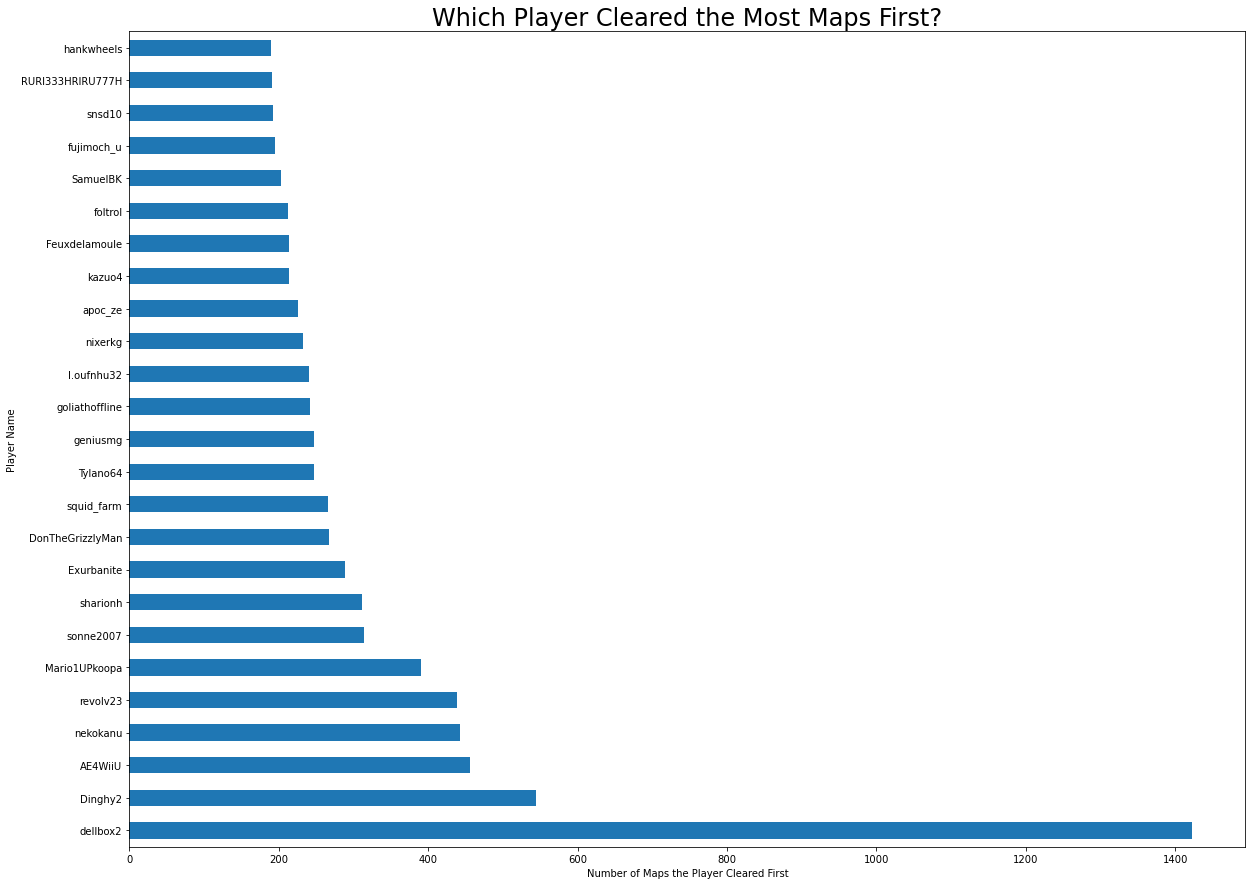

In [14]:
fcp.plot(kind="barh", figsize=(20,15));

plt.rcParams['font.size']='20'
plt.xlabel('Number of Maps the Player Cleared First')
plt.ylabel('Player Name')

plt.title('Which Player Cleared the Most Maps First?')

plt.show()

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<h3><b><i>"Easy" Difficulty</i></b></h3>

In [15]:
easy_diff=pd.read_sql("""

SELECT *
FROM c_plays
WHERE Difficulty LIKE "easy"

""",conn)

In [16]:
easy_tagging=pd.read_sql("""
SELECT *
FROM cm_courses
WHERE Difficulty LIKE 'easy'
""",conn)

<b><i>Maps with the greatest number of play for "easy" level of difficulty</i><b>

In [17]:
easy_diff.groupby(['Map_id','Map_title'])['Difficulty'].count().nlargest(25)

Map_id               Map_title                       
8F40-0000-0391-4B50  ■◆Speed run pour mes amis◆■         1014
0712-0000-0357-84B1  Stoneman 2: Stoneman's Revenge       715
4935-0000-0376-984D  5000 Stars Celebration - Auto        688
D00C-0000-038C-FCD0  ♪Mario kart 8 × Zelda♪               649
CA3C-0000-0365-F44C  Watch The Clock [Puzzle]             638
00C4-0000-0375-FD8E  ♪Despacito♪ChristmasEdition.WALK     538
3537-0000-038D-8BA8  DDLC: ♪Your Reality♪                 530
A206-0000-0342-CCE7  ♪ 9th Symphony of Beethoven ♪        514
C8B1-0000-038E-7B75  MON IDOLE FREDERIC FRANCOIS♡♡♡       472
F850-0000-037D-54D2  Some Players I Want to Thank         461
0D95-0000-0381-CC36  Owl City - Good Time♪                409
D849-0000-0323-4B24  Baby Boo - Auto                      405
B8E1-0000-0363-C08C  My Fav. Mathematician Ramanujan      386
3CF6-0000-032F-14A1  Pajama Time Ness - Auto              380
316A-0000-038C-66C3  POUR MES AMIS 2 merci beaucoup♡♥     374
B504-0000-034B-6

<b><i>What tags are used most often?</i></b>

In [18]:
easy_tagging.groupby(['Level_tagging'])['Level_tagging'].count().sort_values(ascending=False)

Level_tagging
Music           1271
Traditional      767
Theme            376
Speedrun         365
Gimmick          294
Puzzle           291
Automatic        275
Remix            173
Costume          129
Thumbnail         87
Dash              84
Shoot-'em-up      58
Autoscroll        54
Yoshi             53
Name: Level_tagging, dtype: int64

<b><i>Maps with the Most Stars (AKA Likes)</i></b>

In [19]:
easy_tagging.groupby(['Map_id','Map_title','Game_style'])['Num_stars'].sum().sort_values(ascending=False).head(50)

Map_id               Map_title                         Game_style
6B04-0000-0315-CC87  Mario Kart - Jungle Rouble        marioBros     446976
6F7D-0000-0367-3858  glitch texture + canon !!!        marioBrosU     84942
07A4-0000-0361-B438  glitch Goomba's shoe bug !!!      marioBros      65980
75FE-0000-0360-7A1D  glitch Goomba bug !!!             marioBrosU     57403
019F-0000-0360-0B20  glitch illusion !!!               marioBrosU     54081
7A3E-0000-035D-D13A  glitch mini Muncher + Pow bug !!  marioWorld     49516
DF83-0000-0386-D8A0  SMB3 Warp Zone Remix♪             marioBros3     44550
7BD4-0000-035C-A136  glitchs sound bug & lava bug !!!  marioBrosU     42703
5DC6-0000-035E-E665  glitch Frère Marto qui bug !!!    marioBrosU     41408
9146-0000-0377-18DE  Drop the Beat Guess the Band      marioBros3     32444
D849-0000-0323-4B24  Baby Boo - Auto                   marioBrosU     28148
3CF6-0000-032F-14A1  Pajama Time Ness - Auto           marioBros      27382
C531-0000-036A-6444  ♪

<b><i>Most Attempted Game Style</i></b>

In [80]:
easy_tagging.groupby(['Game_style'])['Num_attempts'].sum().sort_values(ascending=False)

Game_style
marioBrosU    8986699
marioBros     8553367
marioWorld    2068214
marioBros3    1433805
Name: Num_attempts, dtype: int64

<b><i>Game Style with the Most Created Maps</i></b>

In [82]:
easy_tagging.groupby(['Game_style'])['Map_id'].count().sort_values(ascending=False)

Game_style
marioBrosU    35213
marioBros     21817
marioWorld     9605
marioBros3     5388
Name: Map_id, dtype: int64

<b><i>Which Player had the greatest number of "first clears"?</i></b>

In [20]:
first_clear_players_easy=easy_tagging.groupby(['Who_cleared_first'])['Map_id'].count().sort_values(ascending=False).head(25)

In [21]:
fcpe=first_clear_players_easy

In [22]:
fcpe

Who_cleared_first
dellbox2            1623
AE4WiiU              638
nekokanu             497
Dinghy2              318
revolv23             314
umecchi              293
Cubeguy21            250
DonTheGrizzlyMan     234
EvanFedak            223
Gorfan               207
RURI333HRIRU777H     204
fujimoch_u           198
tmons78              191
zaretter             184
Bloorose             178
Carter-evans10       178
TOSHI.41             163
splatoune2.0         145
1824KSMARE           138
Mario1UPkoopa        129
Lazenator            127
PONveruta            125
sharionh             121
Sauron17             116
Tylano64             110
Name: Map_id, dtype: int64

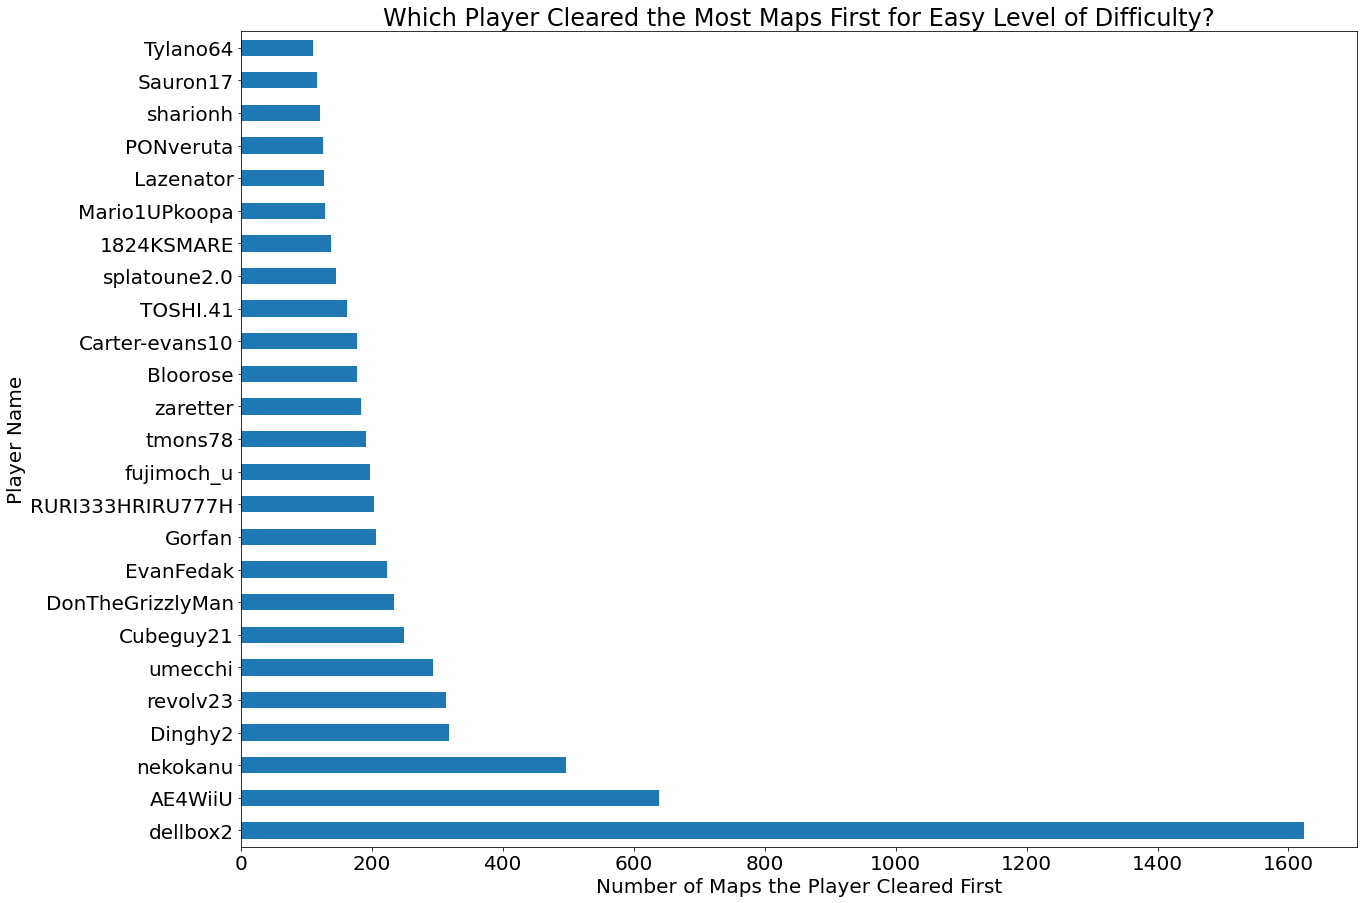

In [23]:
fcpe.plot(kind="barh", figsize=(20,15));

plt.rcParams['font.size']='20'
plt.xlabel('Number of Maps the Player Cleared First')
plt.ylabel('Player Name')

plt.title('Which Player Cleared the Most Maps First for Easy Level of Difficulty?')

plt.show()

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<h3><b><i>"Expert" Difficulty</i></b></h3>

In [24]:
expert_diff=pd.read_sql("""

SELECT *
FROM c_plays
WHERE Difficulty LIKE "expert"

""",conn)

In [25]:
expert_tagging=pd.read_sql("""
SELECT *
FROM cm_courses
WHERE Difficulty LIKE 'expert'
""",conn)

<b><i>Maps with the greatest number of play</i><b>

In [26]:
expert_diff.groupby(['Map_id','Map_title'])['Difficulty'].count().nlargest(25)

Map_id               Map_title                       
F44D-0000-035E-496C  [2YMM] In Muris Occulta             1143
67CF-0000-035F-BC1D  The Kindly Marked Troll Level        966
596A-0000-0375-6596  W10~ Blackcherry Mines               873
9767-0000-0329-7ACE  Pennywise's Level for Children       830
9C75-0000-0362-33D2  [2YMM] Pipe Connection Issues        741
FF30-0000-034F-2967  SMW Remix: Castle #6                 702
F063-0000-0368-BB3E  [HĄŁŁ♥WĘĘŇ]  4 Spðφky Sącrıfıcęs     684
C989-0000-0361-C805  Wii U - VIRUS -                      679
F898-0000-0382-E5FE  [PPP] Pen & Paper Pyramid            673
8157-0000-038E-4B85  Floor is nada                        647
F13E-0000-0360-FB47  Forgotten Fortress                   636
30F3-0000-0386-19B9  Beetles in Paris                     602
0230-0000-0386-B51F  The Blooper Booper!                  592
790A-0000-038D-B2FE  Burn them moles [40]                 579
9FC1-0000-033D-EEA1  Mario Kart DELUXE?!?                 576
8A10-0000-0359-3

<b><i>What tags are used most often?</i></b>

In [27]:
expert_tagging.groupby(['Level_tagging'])['Level_tagging'].count().sort_values(ascending=False)

Level_tagging
Traditional     2241
Theme           2143
Puzzle          2048
Speedrun        1766
Gimmick         1031
Remix            727
Dash             384
Autoscroll       283
Costume          252
Music            186
Thumbnail        124
Track            115
Yoshi             99
Shoot-'em-up      89
Automatic         27
Name: Level_tagging, dtype: int64

<b><i>Maps with the Most Stars (AKA Likes)</i></b>

In [28]:
expert_tagging.groupby(['Map_id','Map_title','Game_style'])['Num_stars'].sum().sort_values(ascending=False).head(50)

Map_id               Map_title                         Game_style
9FC1-0000-033D-EEA1  Mario Kart DELUXE?!?              marioBros     555600
632D-0000-0329-503E  Kaizo Training!                   marioWorld    295487
F44D-0000-035E-496C  [2YMM] In Muris Occulta           marioBros     187785
9C75-0000-0362-33D2  [2YMM] Pipe Connection Issues     marioWorld    173251
3373-0000-0306-81B8  Propeller Mushroom Parkour        marioBrosU    126953
D6A9-0000-034A-58F0  Training: Kaizo-Cave Challenges!  marioWorld     74586
67CF-0000-035F-BC1D  The Kindly Marked Troll Level     marioBros      65668
F063-0000-0368-BB3E  [HĄŁŁ♥WĘĘŇ]  4 Spðφky Sącrıfıcęs  marioWorld     59176
C989-0000-0361-C805  Wii U - VIRUS -                   marioBros3     52834
7C3B-0000-0334-80E7  StreetPass Castle                 marioBrosU     51827
5DF0-0000-031D-6CA5  Kaizo Training for Beginners      marioBrosU     48691
8A10-0000-0359-3AC2  - SUPER MARIO MAKER -             marioBrosU     45058
40A4-0000-0337-5CC9  W

<b><i>Most Attempted Game Style</i></b>

In [29]:
expert_tagging.groupby(['Game_style'])['Num_attempts'].sum().sort_values(ascending=False)

Game_style
marioBros     55206614
marioWorld    36572154
marioBrosU    22500817
marioBros3     9720468
Name: Num_attempts, dtype: int64

<b><i>Game Style with the Most Created Maps</i></b>

In [30]:
expert_tagging.groupby(['Game_style'])['Map_id'].count().sort_values(ascending=False)

Game_style
marioBrosU    30056
marioWorld    21587
marioBros     16131
marioBros3     8838
Name: Map_id, dtype: int64

<b><i>Which Player had the greatest number of "first clears"?</i></b>

In [31]:
first_clear_players_expert=expert_tagging.groupby(['Who_cleared_first'])['Map_id'].count().sort_values(ascending=False).head(25)
fcpex=first_clear_players_expert

In [32]:
fcpex

Who_cleared_first
nixerkg          824
Mario1UPkoopa    636
SapphireDrew     605
AE4WiiU          506
Kiavik           506
kaikazumyu114    357
Thabeast721      329
kazuo4           289
ZPappa7          276
nekokanu         268
spghost129       250
Tylano64         232
asanvido         230
N-Mario1984      223
Gratoffie        222
dellbox2         220
dev1n2016        212
revolv23         211
hankwheels       192
RE5wjB           191
Fritzef          191
Choaslegion      186
JulioMega        184
flame633635      179
MetZelRio        179
Name: Map_id, dtype: int64

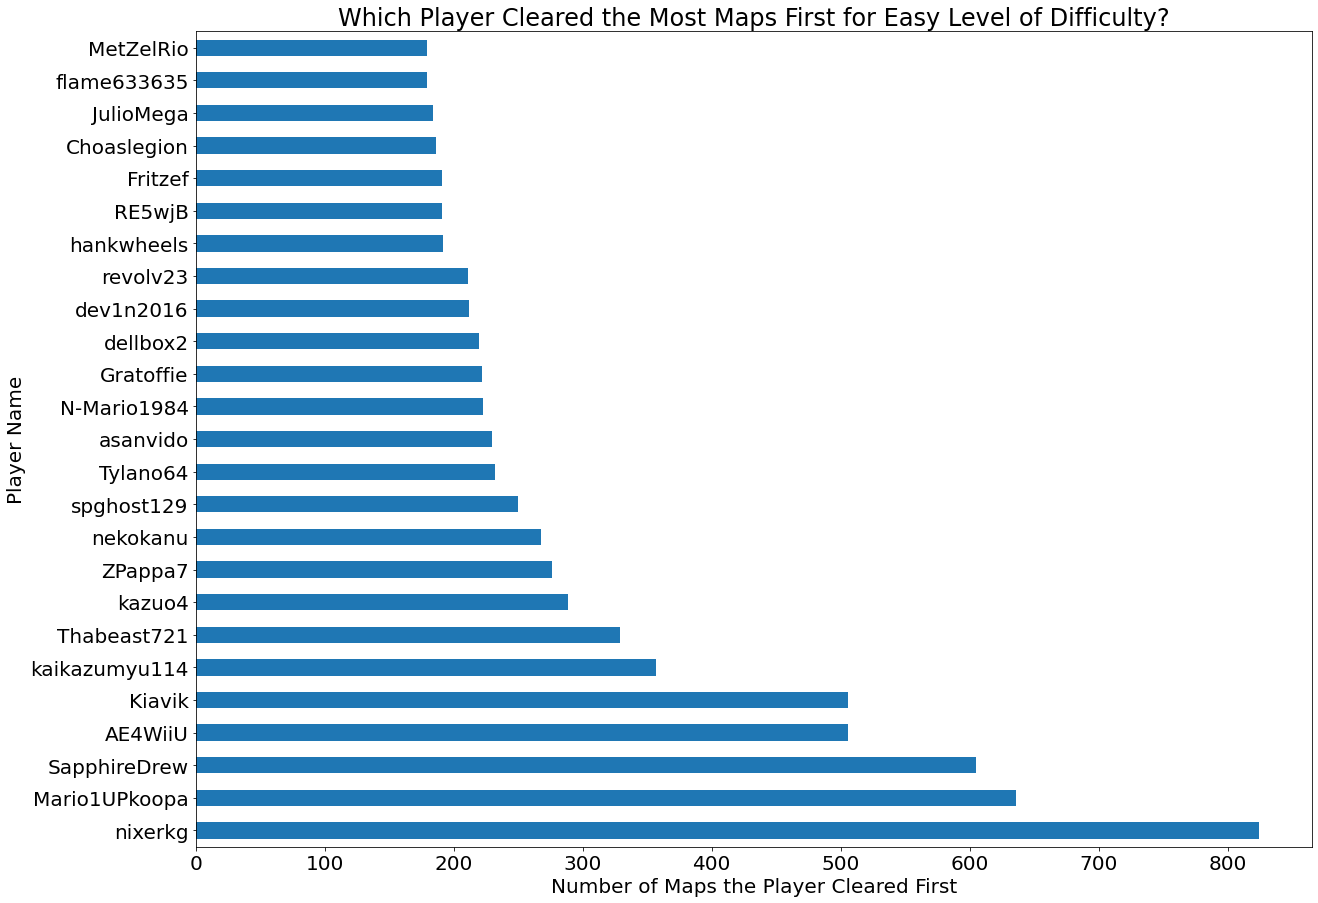

In [33]:
fcpex.plot(kind="barh", figsize=(20,15));

plt.rcParams['font.size']='20'
plt.xlabel('Number of Maps the Player Cleared First')
plt.ylabel('Player Name')

plt.title('Which Player Cleared the Most Maps First for Easy Level of Difficulty?')

plt.show()

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<h3><b><i>"SuperExpert" Difficulty</i></b></h3>

In [34]:
superexpert_diff=pd.read_sql("""

SELECT *
FROM c_plays
WHERE Difficulty LIKE "superExpert"

""",conn)

In [35]:
superexpert_tagging=pd.read_sql("""
SELECT *
FROM cm_courses
WHERE Difficulty LIKE 'superExpert'
""",conn)

<b><i>Maps with the greatest number of play</i><b>

In [36]:
superexpert_diff.groupby(['Map_id','Map_title'])['Difficulty'].count().nlargest(25)

Map_id               Map_title                       
DE4D-0000-035D-3AE1  [2YMM] Spiny Side Down              1089
CEB8-0000-0353-A31E  Tricky House #1: Spring Time         900
CBB0-0000-0329-CA7C  Barb Wired                           819
2B8D-0000-0312-9D77  Just the Tip... of the Iceberg       766
345E-0000-034A-976E  Pokémon - VS Champion Red♪           678
2037-0000-0358-068D  LSB: Boot On Boo Boogaloo            632
1F6D-0000-0331-75D7  The Fall of Muncher Manor            601
D627-0000-038E-746C  You've Learned Nothing! #Contest     545
520E-0000-030F-5871  The Jaws of Life                     501
417A-0000-0389-57A3  [Race] Jumpu's Fiery Fiesta          481
4705-0000-038D-0C82  Small Mario in Blooper's Land        434
A750-0000-032D-6933  Dizzy Koopa Cavern                   416
9E69-0000-0358-B454  Tricky House #1: Spring Time         405
EDC4-0000-0388-F160  Aerial Adventure #Race               391
58BB-0000-033A-75D5  The Living Ground Is All Around      377
CFE4-0000-035B-A

<b><i>What tags are used most often?</i></b>

In [37]:
superexpert_tagging.groupby(['Level_tagging'])['Level_tagging'].count().sort_values(ascending=False)

Level_tagging
Theme           1711
Speedrun        1643
Gimmick         1091
Dash            1001
Traditional      794
Music            679
Puzzle           418
Autoscroll       377
Thumbnail        307
Track            168
Yoshi             76
Automatic         61
Shoot-'em-up      38
Costume           35
Remix             32
Name: Level_tagging, dtype: int64

<b><i>Maps with the Most Stars (AKA Likes)</i></b>

In [38]:
superexpert_tagging.groupby(['Map_id','Map_title','Game_style'])['Num_stars'].sum().sort_values(ascending=False)

Map_id               Map_title                         Game_style
DE4D-0000-035D-3AE1  [2YMM] Spiny Side Down            marioBros     683646
1F6D-0000-0331-75D7  The Fall of Muncher Manor         marioBros     382072
345E-0000-034A-976E  Pokémon - VS Champion Red♪        marioBros     354250
A750-0000-032D-6933  Dizzy Koopa Cavern                marioBros     203575
2037-0000-0358-068D  LSB: Boot On Boo Boogaloo         marioBros     162425
                                                                      ...  
179B-0000-0341-6ABE  Will you pass the 4 levels ?      marioBros3         1
F145-0000-034C-13EC  Oops                              marioBrosU         1
F4C5-0000-0364-C468  jump quest request                marioWorld         0
C490-0000-0345-F6D8  Woodstock's death pit of death    marioBros3         0
B334-0000-0358-3378  Ne ragez pas :3 lvl pour cbgames  marioBrosU         0
Name: Num_stars, Length: 6233, dtype: int64

<b><i>Most Attempted Game Style</i></b>

In [39]:
superexpert_tagging.groupby(['Game_style'])['Num_attempts'].sum().sort_values(ascending=False)

Game_style
marioBros     236184243
marioWorld    114021188
marioBrosU     27852262
marioBros3     14604514
Name: Num_attempts, dtype: int64

<b><i>Game Style with the Most Created Maps</i></b>

In [40]:
superexpert_tagging.groupby(['Game_style'])['Map_id'].count().sort_values(ascending=False)

Game_style
marioWorld    12089
marioBrosU     8014
marioBros      6301
marioBros3     2548
Name: Map_id, dtype: int64

<b><i>Which Player had the greatest number of "first clears"?</i></b>

In [41]:
first_clear_players_superexpert=superexpert_tagging.groupby(['Who_cleared_first'])['Map_id'].count().sort_values(ascending=False).head(25)
fcpsuper=first_clear_players_superexpert

In [42]:
fcpsuper

Who_cleared_first
Keiichied           593
Mario1UPkoopa       454
andrewplatt2        327
Firzen592798        278
foltrol             273
Kiavik              273
barbarianking       269
LeLe521             248
ShadowLiink         247
kouseband           245
ZPappa7             243
AE4WiiU             236
xBrosirisx          229
Gratoffie           224
Thabeast721         220
maggara666          210
Alazer              200
Khazey              196
SuperPaperPerson    194
jiklio17            190
YoshiKart14         187
edmanjunior         184
Fritzef             178
rundom2525          177
OzKat502            172
Name: Map_id, dtype: int64

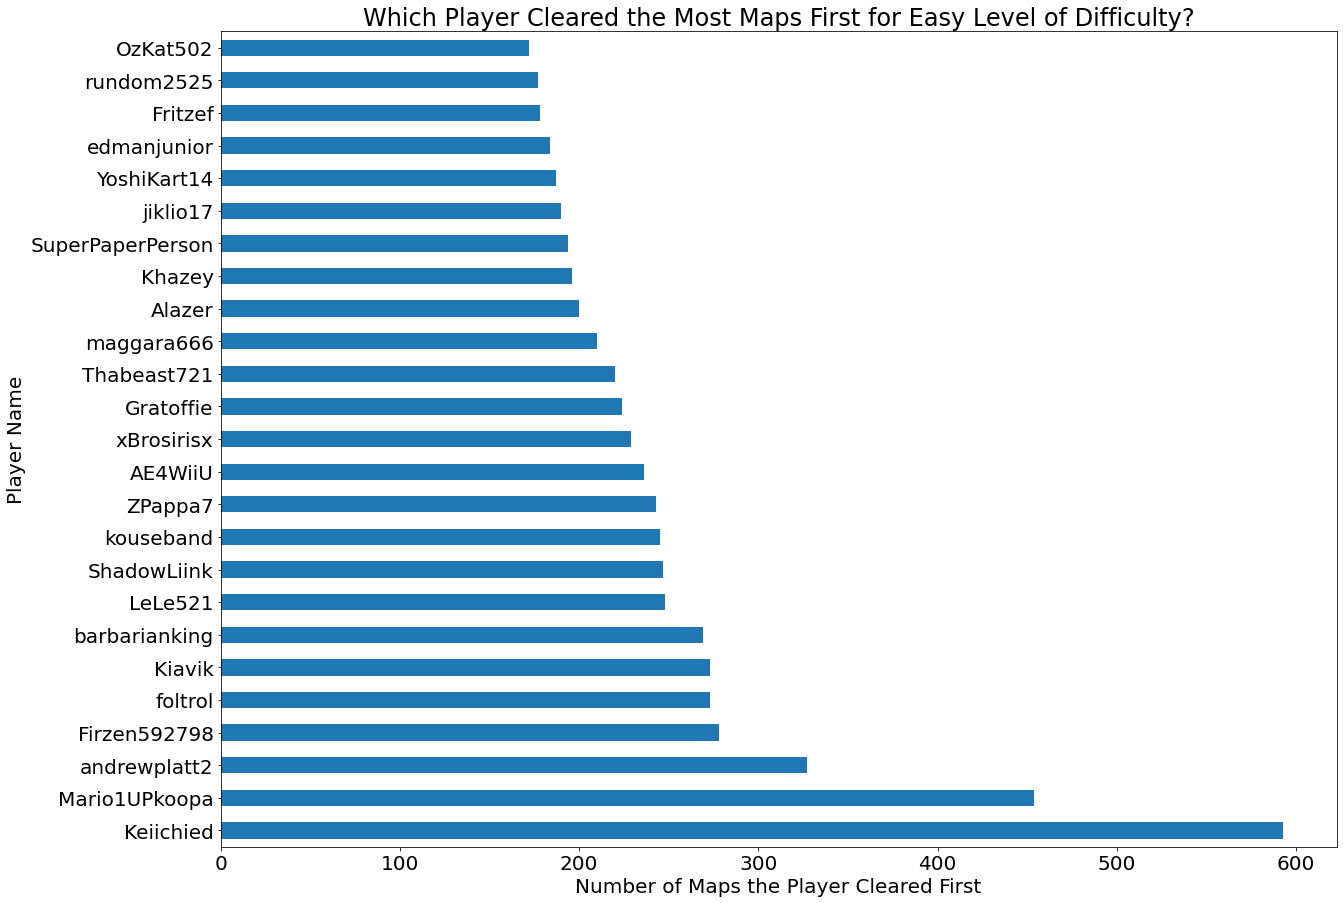

In [43]:
fcpsuper.plot(kind="barh", figsize=(20,15));

plt.rcParams['font.size']='20'
plt.xlabel('Number of Maps the Player Cleared First')
plt.ylabel('Player Name')

plt.title('Which Player Cleared the Most Maps First for Easy Level of Difficulty?')

plt.show()

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<H2><b>Players</b></H2><a id="Playersda"></a>

In [33]:
r_courses=pd.merge(records,courses,left_on='Map_id',right_on='Map_id')
r_c_players=pd.merge(r_courses,players,left_on='Player',right_on='Id')
c_players=pd.merge(courses,players,left_on='Maker',right_on='Id')
p_players=pd.merge(plays,players,left_on='Player_id',right_on='Id')

In [34]:
r_courses.to_csv('12_29_20_r_courses.csv',index=False)
r_c_players.to_csv('12_29_20_r_c_players.csv',index=False)
c_players.to_csv('12_29_20_c_players.csv',index=False)
p_players.to_csv('12_29_20_p_players.csv',index=False)

<b><i>Number of Players By Country</i></b>

In [45]:
players.groupby(['Flag'])['Id'].count().nlargest(30)

Flag
US    292471
JP    286507
FR     50212
DE     48182
CA     46110
GB     37282
MX     28017
ES     22070
AU      9651
NL      9475
IT      6960
CL      5311
AT      5175
BE      4651
SE      4236
IE      3514
CH      3510
BR      3007
FI      2178
PE      1876
NO      1858
CO      1493
PT      1225
GT       877
DK       848
CR       761
VE       740
PA       642
PL       627
RU       546
Name: Id, dtype: int64

<b><i>Countries that had the Greatest Number of Plays?</i></b>

In [46]:
p_players.groupby(['Flag'])['Player_id'].count().nlargest(30)

Flag
US    1333251
JP    1146642
FR     255589
DE     223450
CA     195945
GB     167653
MX     152831
ES     108347
NL      45088
AU      41670
IT      33142
CL      25794
AT      24994
BE      23544
SE      19947
CH      16108
BR      16016
IE      15631
FI      11858
PE      11463
NO       9022
CO       7528
PT       6123
GT       5696
VE       3835
CR       3786
DK       3515
PL       3316
PA       2920
EC       2860
Name: Player_id, dtype: int64

<b><i>Which Country had the Greatest Number of Maps Created?</i></b>

In [47]:
c_players.groupby(['Flag'])['Maker'].count().sort_values(ascending=False)

Flag
FR    40464
DE    37278
CA    34485
BR     2729
Name: Maker, dtype: int64

<i>US and Japan did not have maps created? Were the maps that were created in US and Japan not popular enough or deemed inappropriate?</i>

<b><i>Which Players had the Greatest Number of records?</i></b>

In [48]:
r_c_players.groupby(['Player','Flag'])['Milliseconds'].count().nlargest(50)

NameError: name 'r_c_players' is not defined

<b><i>Average Record Time by Player</i></b>

In [65]:
r_c_players.groupby(['Player','Flag'])['Milliseconds'].mean().round(2).sort_values(ascending=True)

Player            Flag
hiro5511          JP           16.0
Titou.drn         FR           16.0
KAlexis2005       BE           16.0
cdmf2002          MX           16.0
SReardon06        US           16.0
                            ...    
ohiru3-0812       JP      5999999.0
David_SalSan      MX      5999999.0
SimoneSuperBowse  IT      5999999.0
AntoineEtLola     FR      5999999.0
qwertyuhgfdsa     JP      5999999.0
Name: Milliseconds, Length: 63436, dtype: float64

<b><i>Which Player Made the Most Maps</i></b>

In [75]:
c_players.groupby(['Maker','Flag'])['Map_id'].count().sort_values(ascending=False).head(50)

Maker             Flag
Xavierol69        FR      100
Zerodius          CA      100
JustinDianaRalf   DE       83
drmsj1983         CA       80
Shiraur           FR       80
Leeshino          FR       69
N-Player2.0       DE       69
quentintheret     FR       68
SeigneurSkull     FR       67
Monkeydelphin173  DE       67
mederic39         FR       65
nathanda2006      FR       61
Tylano64          FR       58
Giant666          DE       57
thezzie           CA       57
Handrick          DE       56
INFINITY0087      CA       53
lennydis          FR       53
wxcvbbbbbb        FR       51
SomeMiiID         CA       51
snaggyy           DE       51
SeanWhat          CA       50
boludoo           FR       50
jeanbatman59700   FR       50
ethian15          FR       50
Cdeluxe           DE       50
alexy031206       FR       49
WillianFOX        BR       49
NicoPrevoNin10do  FR       49
GTRP_Easy         DE       49
revolvmula        FR       49
smb1hujo172       DE       49
ZakLeTroll       

<b><i>Which Players played the most?</i></b>

In [74]:
p_players.groupby(['Player_id','Flag'])['Map_id'].count().sort_values(ascending=False).head(50)

Player_id         Flag
Conducteur59220   FR      2681
dellbox2          JP      1951
AE4WiiU           US      1686
revolv23          FR      1437
demonhunter47223  US      1246
WIIMoustique      FR      1244
buddy1943indiana  US      1242
Plusbellelavie5   FR      1234
Feuxdelamoule     FR      1096
cowboye123        FR      1068
quentintheret     FR      1035
Tylano64          FR      1010
jacky1303         DE       989
apoc_ze           US       958
RURI333HRIRU777H  JP       944
Alexis2012        US       919
shinbu-10         JP       894
shailo1996        BE       870
Leeshino          FR       831
666666io          JP       822
mario-tomoya      JP       759
indien1966        FR       750
sioux4            FR       709
Ultra152          DE       671
coeur2017         FR       668
Mario1UPkoopa     US       665
AndrewMarenkovic  US       652
tanaka-to         JP       650
ritzMo            DE       648
neisan.yo         JP       633
tc.coeur          FR       616
pedritopin2015  

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<H2><b>Players Playing Profile</b></H2><a id="PPP"></a>

In [135]:
playo=pd.read_csv('../Capstone/likes_debugged.csv')
p_p=pd.merge(players,playo,left_on='Id',right_on='Player')
p_p.rename(columns={'Id_x':'Map_id'},inplace=True)
p_p=p_p.drop('Id_y',axis=1)
#p_p_courses=pd.merge(p_p,courses,left_on='Map_id',right_on='Map_id')
#p_p_courses.rename(columns={'Catch':'Timedate_play'},inplace=True)
#p_p_courses.to_csv('12_30_20_p_p_courses.csv',index=False)

In [134]:
ppg=p_p.groupby(['Player','Flag'])['Catch'].count().sort_values(ascending=False)

In [129]:
ppg=pd.DataFrame(ppg)

In [131]:
ppg.to_csv('ppg.csv')

In [139]:
cplayersg=c_players.groupby(['Maker'])['Map_id'].count().sort_values(ascending=False)

In [121]:
cplayersg=pd.DataFrame(cplayersg)

In [123]:
cplayersg.to_csv('cplayersg.csv')

<i>"cplayersg" and "ppg" is found in the Excel/Tableau file...I have used both to create SMM_Deliverables_2</i>

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<p align="center">
<img src="img/Seven_stars.jpg" alt="drawing" width='1200'/>
</p>

<center><h2><b><u>Sources</u></b></h2></center>

<H3>Data</H3>

* [SMMnet Kaggle](https://www.kaggle.com/leomauro/smmnet?select=players.csv) - https://www.kaggle.com/leomauro/smmnet?select=players.csv
* [List of Country Codes](https://gist.github.com/tadast/8827699#file-countries_codes_and_coordinates-csv) - https://gist.github.com/tadast/8827699#file-countries_codes_and_coordinates-csv

<H3>Images</H3>

* [Super Mario Maker Cover](https://www.nintendo.co.uk/Games/Wii-U/Super-Mario-Maker-892704.html)
* [Super Mario and Friends](https://sea.ign.com/super-mario-maker-2/150524/news/super-mario-maker-2-nintendo-working-on-allowing-friends-to-play-together-online-e3-2019)
* [Mario Luggage](https://4chanarchives.com/board/v/thread/431564)
* [Mario Cleaning](https://twitter.com/vgartandtidbits/status/1037722631863250945?lang=da)

<H3>Additional</H3>

* [Super Mario Maker Soundtrack](#https://downloads.khinsider.com/game-soundtracks/album/super-mario-maker-soundtrack)
* [March 2021 Will Be A Tough Time for Super Mario Fans](#https://gamerant.com/super-mario-march-2021/)
* [The Top 5 Video Game Conferences in North America](#https://www.proexhibits.com/blog/video-game-events/)
* [Gamestop Reports Third Quarter Results](#https://www.globenewswire.com/news-release/2020/12/08/2141775/0/en/GameStop-Reports-Third-Quarter-Results-A-Positive-Start-to-Fourth-Quarter-with-November-Comparable-Store-Sales-Increasing-16-5-And-Sustained-Progress-Toward-Long-Term-Strategic-Obj.html)
* [Super Mario Maker Wiki](#https://www.mariowiki.com/Super_Mario_Maker)

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<p align="center">
<img src="img/Enemies.jpg" alt="drawing" width='1200'/>
</p>

<H2><b><u>ERD</u></b></H2><a id = 'ERD'></a>

<p align="center">
<img src="img/ERD.png" alt="drawing" width='1600'/>
</p>

<div style="text-align:right"><a href = "#Directory">Directory</a></div>

<h2><b><u>Project Plan</u></b></h2><a id='Project_Plan'></a>

<B>Overarching Question</B><BR><BR>
    &ensp;&ensp;What made Super Mario Maker so popular?<BR><BR>
    
<B>Questions that will be answered in my analysis:</B><BR><BR>
    * What was the most popular game style?<BR>
&ensp;&ensp;&ensp;&ensp;<i>(most attempted map by game style, maps with the most number of likes, are there specific tags that are most used?)</i><BR>
    * Player characteristics<BR>
&ensp;&ensp;&ensp;&ensp;<i>(Number of players per country, number of plays by country, number of maps created by country, which players had the greatest number of records, which players made the most maps, which players played the most)<BR><BR>
<B>Source</B><BR><BR>
&ensp;The dataset: https://www.kaggle.com/leomauro/smmnet?select=players.csv – This dataset was extracted from supermariomakerbookmark.nintendo.net under the Creative Commons BY license. <BR><BR>
<B>Overall Process for Investigation and Analysis In Order To Make A Recommendation</B><BR><BR>
    * Please see <i>questions that will be answered in my analysis</i> for some of the KPI’s that I will be utilizing to answer the overarching question<BR>
    * I am reviewing nulls and will make decisions about what to do with them once I am further in investigation (if there are not too many, I may remove these rows of data if they do not provide relevant information).<BR><BR>
<B>Limitations and Assumptions</B><BR><BR>
    * An assumption that I am making is that the number of plays is correlated to the popularity of level.<BR>


<div style="text-align:right"><a href = "#Directory">Directory</a></div>